## Observations and Insights 

# Summary observations:
1) Tumor growth study results were compiled using 248 out of the initially identified 249 mice.
 
2) The sample size of mice was split 50/50 between male and female mice.
 
3) The top two drug regimens that were tested (in terms of timecounts) were Capomulin and Ramicane;  
   they both had the lowest average tumor volumes across all drug regimens.

4) Capomulin drug regimen showed consistent tumor volume reduction across timepoints for tested mice.
 
5) There is a moderately positive correlation between the weight of mice and their average tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = combined_data['Mouse ID'].unique()
len(mouse_count)

249

In [3]:
# Timepoints are in increments of 5 up to 45 days so check to see if there are Mouse IDs occuring more than 10 times
# This indicates potential for duplicate timecounts per Mouse ID
combined_data['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_data['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = combined_data.loc[combined_data['Mouse ID']=='g989']
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.loc[combined_data['Mouse ID'] != 'g989']
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = cleaned_data['Mouse ID'].unique()
len(cleaned_mouse_count)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_data = cleaned_data.groupby('Drug Regimen')

avg_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
stdev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
SEM_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summary_stat1 = pd.DataFrame({'Average Tumor Volume': avg_tumor_volume,
                           'Median Tumor Volume': median_tumor_volume,
                           'Variance of Tumor Volume': variance_tumor_volume,
                           'Standard Deviation of Tumor Volume': stdev_tumor_volume,
                           'SEM of Tumor Volume': SEM_tumor_volume})
summary_stat1

,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat2 = grouped_data['Tumor Volume (mm3)'].\
                aggregate(['mean', 'median', 'var', 'std', 'sem']).\
                rename(columns={'mean': 'Average Tumor Volume', 'median': 'Median Tumor Volume',\
                                'var': 'Variance of Tumor Volume', 'std': 'Standard Deviation of Tumor Volume',\
                                'sem': 'SEM of Tumor Volume'})
summary_stat2



,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

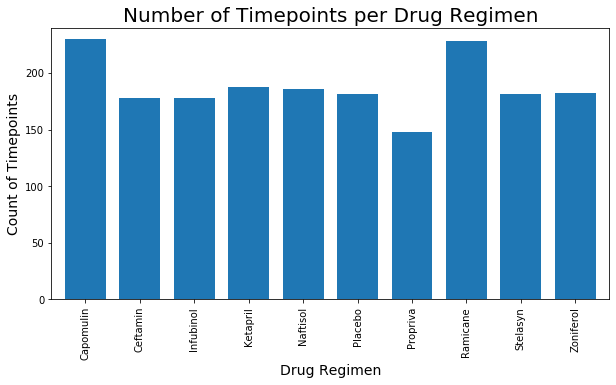

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
timepoints_per_drug = grouped_data['Timepoint'].count()

# Use DataFrame.plot() in order to create a bar chart of the data
bar_plot = timepoints_per_drug.plot(kind='bar', width=0.75, figsize=(10,5),
                                    xlim=(-0.75, len(grouped_data)-0.25), ylim=(0, max(timepoints_per_drug)+10))
bar_plot.set_xticklabels(timepoints_per_drug.keys(), rotation='vertical')

# Set a title and labels
bar_plot.set_title('Number of Timepoints per Drug Regimen', fontdict={'fontsize':20})
bar_plot.set_xlabel('Drug Regimen', fontdict={'fontsize':14})
bar_plot.set_ylabel('Count of Timepoints', fontdict={'fontsize':14})
plt.show()

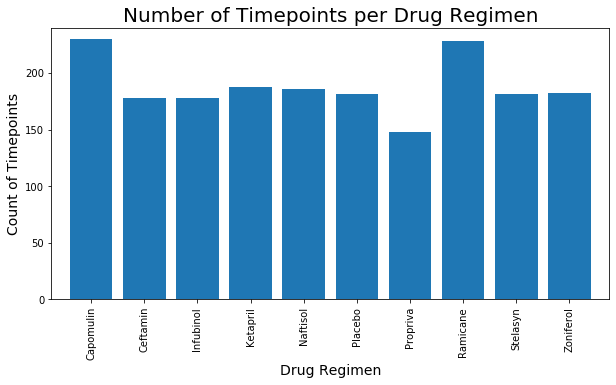

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
len(timepoints_per_drug)
x_axis = np.arange(len(timepoints_per_drug))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, timepoints_per_drug)
plt.xticks(tick_locations, timepoints_per_drug.keys(), rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(grouped_data)-0.25)
plt.ylim(0, max(timepoints_per_drug)+10)

# Set a Title and labels
plt.title("Number of Timepoints per Drug Regimen", fontdict={'fontsize':20})
plt.xlabel("Drug Regimen", fontdict={'fontsize':14})
plt.ylabel("Count of Timepoints", fontdict={'fontsize':14})
plt.show()

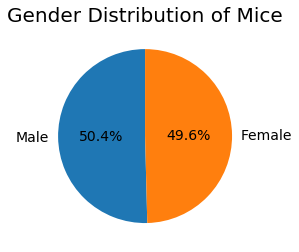

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Remove duplicate 'Mouse IDs'
gender_dist = cleaned_data.drop_duplicates(subset=['Mouse ID', 'Sex'])

# Create Series of Count of Mice by Gender
mouse_count_by_gender = gender_dist['Sex'].value_counts()

# Create pie chart 
pie_plot = mouse_count_by_gender.plot(kind='pie', ylabel="", autopct="%1.1f%%", 
                                      pctdistance=0.5, labeldistance=1.1, shadow=False, startangle=90, textprops={'fontsize': 14})
pie_plot.set_title('Gender Distribution of Mice', fontdict={'fontsize':20})
plt.show()

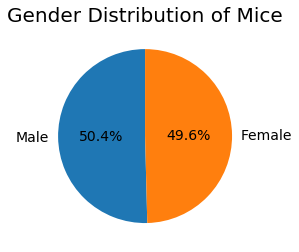

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Gender Distribution of Mice", fontdict={'fontsize':20})
plt.pie(mouse_count_by_gender, labels=mouse_count_by_gender.keys(), autopct="%1.1f%%", 
        pctdistance=0.5, labeldistance=1.1, shadow=False, startangle=90, textprops={'fontsize': 14})
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Since the cleaned_data was sorted in ascending order of timepoints per Mouse ID, we can simply remove Mouse ID duplicates and keep the last unique Mouse ID
last_mouse_timepoint = cleaned_data.drop_duplicates(subset=['Mouse ID'], keep='last')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# The result is a reduced version of the original dataframe (showing only the last Timepoints per mouse)
last_mouse_timepoint

# Resetting index of new dataframe that shows maximum timepoint for each Mouse ID
last_mouse_timepoint.reset_index(drop=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_rows = last_mouse_timepoint.loc[last_mouse_timepoint['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(treatment_rows)    
   
    # Determine outliers using upper and lower bounds
    quartiles = treatment_rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f" For {treatment} Drug Regimen: ")
    print(f"The lower quartile of final tumor volumes is: {lowerq}")
    print(f"The upper quartile of final tumor volumes is: {upperq}")
    print(f"The interquartile range of final tumor volumes is: {iqr}")
    print(f"The median of final tumor volumes is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

 For Capomulin Drug Regimen: 
The lower quartile of final tumor volumes is: 32.37735684
The upper quartile of final tumor volumes is: 40.1592203
The interquartile range of final tumor volumes is: 7.781863460000004
The median of final tumor volumes is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 For Ramicane Drug Regimen: 
The lower quartile of final tumor volumes is: 31.56046955
The upper quartile of final tumor volumes is: 40.65900627
The interquartile range of final tumor volumes is: 9.098536719999998
The median of final tumor volumes is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 For Infubinol Drug Regimen: 
The lower quartile of final tumor volumes is: 54.04860769
The upper quartile of final tumor volumes is: 65.52574285
The interquartile range of final tumor volumes is: 11.477135160000003
The median of final tumor volumes is: 60.16518046
Values below 36.83

NameError: name 'red_square' is not defined

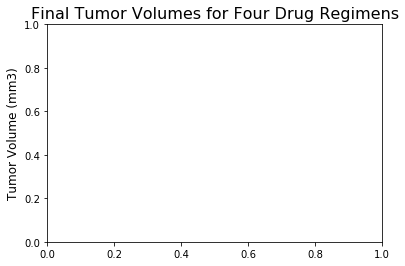

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_squ = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Four Drug Regimens', fontdict={'fontsize':16})
ax1.set_ylabel('Tumor Volume (mm3)', fontdict={'fontsize':12})
ax1.boxplot(tumor_vol_data, flierprops=red_square)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Filter relevant data set
plot_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']

# Identifying unique 'Mouse IDs' in line_plot_Data
plot_data['Mouse ID'].unique()

# Selecting 'Mouse ID'= s185 for line plot
mouse_sample_data = plot_data.loc[plot_data['Mouse ID'] == 's185']

# Create the X and Y axis lists
# x_axis = np.arange(min(mouse_sample_data['Timepoint']), max(mouse_sample_data['Timepoint']), 5)
x_axis = mouse_sample_data['Timepoint']
y_axis = mouse_sample_data['Tumor Volume (mm3)']

# Plot the chart
plt.title("Chart of Tumor Volume vs Timepoint for Mouse ID 's185'", fontdict={'fontsize':18})
plt.xlabel('Timepoints', fontdict={'fontsize':14})
plt.ylabel('Tumor Volume (mm3)', fontdict={'fontsize':14})
plt.xlim(min(mouse_sample_data['Timepoint']), max(mouse_sample_data['Timepoint']))
plt.ylim(0,max(mouse_sample_data['Tumor Volume (mm3)'])+4)
plt.plot(x_axis, y_axis, color='blue')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# plot_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(7,7), 
#                    title="Tumor Volume vs Weight")
x_values = plot_data['Weight (g)']
y_values = plot_data['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight')
plt.show()



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight_Capomulin = plot_data['Weight (g)']
avg_tumor_volume_Capomulin = plot_data['Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weight_Capomulin, avg_tumor_volume_Capomulin)
print(f"The correlation is: {round(correlation[0],2)}")

In [ ]:
# Add the linear regression and line to scatter plot
x_values = plot_data['Weight (g)']
y_values = plot_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight')
print(f"The r-squared is: {rvalue**2}")
plt.show()
